# Business objective: 
#### The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

# Goals of data analysis: Your goals are divided into three sub-goals:
Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping

In [1]:
import numpy as np
import pandas as pd


In [2]:
companies = pd.read_csv("./companies.txt",sep="\t",encoding = "ISO-8859-1")


len(companies["permalink"].unique())

66368

In [3]:
companies.shape
companies.info()
companies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
pd.set_option("display.max_columns",25)
pd.set_option("display.max_rows",60)

In [6]:
companies.to_excel("./companiesdata.xlsx",index=False)



#### Reading rounds2 file in to rounds2 dataframe.



In [8]:
rounds2 = pd.read_csv("./rounds2.csv",encoding = "ISO-8859-1")
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
print(len(rounds2["company_permalink"].unique()))

90247


In [10]:
len(companies["name"].unique())

66103

In [11]:
len(companies["permalink"].unique())


66368

In [12]:
# It is observed that in rounds 2 table permalink column has repeating values with different cases like some are in Caps and some are in small 
# so to make it uniform we convert all the string values to lower case in rounds2 company_permalink column .
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
rounds2.head(20)



,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


### count of unique companies in rounds2 table

In [13]:
len(rounds2["company_permalink"].unique())

66370

### count of unique companies in companies table

In [14]:
# converting all the string values in column permalink of companies dataframe to lower case to make it uniform.
companies["permalink"] = companies["permalink"].str.lower()
len(companies["permalink"].unique())

66368

### Merging Companies dataframe with  Rounds2 dataframe.

In [15]:
master_frame = pd.merge(rounds2,companies,how="inner",left_on="company_permalink",right_on="permalink")
master_frame.info()
master_frame.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


# Data Cleaning

In [16]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

### For analysing we need value in raised_amount_usd if it is null then the respective row is of no value for Data Analysis

In [17]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [18]:
master_frame.shape

(94958, 16)

In [19]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66789
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
dtype: int64

In [20]:
master_frame["company_permalink"].describe()

count                        94958
unique                       53914
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [21]:
### we dont require the values of funding round code,founded at and homepage url for analysis so dropping those columns

master_frame = master_frame.drop('funding_round_code',axis=1)
master_frame = master_frame.drop('founded_at',axis=1)
master_frame = master_frame.drop('homepage_url',axis=1)

In [22]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong


In [24]:
master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          1
category_list              1044
status                        0
country_code               5850
state_code                 7603
region                     7047
city                       7044
dtype: int64

### For our analysis we need country_code and category_list values if these fields are empty then the corresponding rows hold no meaning for our Data analysis, so dropping such rows

In [25]:
master_frame = master_frame[~master_frame.country_code.isnull()]
master_frame = master_frame[~master_frame.category_list.isnull()]

In [26]:
master_frame.isnull().sum()
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

observing above values in percentage we know that most of the columns which we require for analysis hold non-null values
so now the data set is cleaned.

# Check point 2 :Funding Type Analysis

In [27]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
post_ipo_debt            1.694518e+08
secondary_market         8.443853e+07
private_equity           7.393849e+07
post_ipo_equity          6.607706e+07
debt_financing           1.716765e+07
undisclosed              1.589166e+07
venture                  1.172422e+07
grant                    4.512698e+06
product_crowdfunding     1.353227e+06
convertible_note         1.337187e+06
angel                    9.715739e+05
seed                     7.477937e+05
equity_crowdfunding      5.098980e+05
non_equity_assistance    4.807534e+05
Name: raised_amount_usd, dtype: float64

converting the raised amount in to millions so that it becomes easy to read.

In [28]:

master_frame['raised_amount_usd'] = pd.DataFrame(master_frame['raised_amount_usd']).apply(lambda value :round((value/1000000),4))



In [29]:
master_rename = master_frame.rename(columns = {"raised_amount_usd" : "raised_amount_mil"},inplace=True)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.7000,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.0412,/organization/01games-technology,01Games Technology,Games,operating,HKG,NaN,Hong Kong,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.0434,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver


In [30]:
master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_mil             0
permalink                     0
name                          1
category_list                 0
status                        0
country_code                  0
state_code                 1731
region                     1184
city                       1181
dtype: int64

In [31]:
round((master_frame.isnull().sum()/len(master_frame.index))*100,2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_mil          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

## Now checking the average amounts of fund for each funding round type

In [32]:
master_frame.groupby('funding_round_type').mean()

,raised_amount_mil
funding_round_type,
angel,0.971574
convertible_note,1.337187
debt_financing,17.167654
equity_crowdfunding,0.509898
grant,4.512698
non_equity_assistance,0.480752
post_ipo_debt,169.451789
post_ipo_equity,66.077059
private_equity,73.938486


### From above observation we can see that average investment in Venture is 11.72 million which falls in between 5 to 15 million  

Average funding amount of venture type        = 11.72 million <br>
Average funding amount of angel type          = 0.9715 million <br>
Average funding amount of seed type           = 0.74 million   <br>
Average funding amount of private equity type = 73 million     <br>

Filtering rows which have investment in Venture round type

In [33]:
master_vent = master_frame.where(master_frame.funding_round_type == "venture")

In [34]:
master_frame.isnull().sum()

company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_mil             0
permalink                     0
name                          1
category_list                 0
status                        0
country_code                  0
state_code                 1731
region                     1184
city                       1181
dtype: int64

# Checkpoint 3 country analysis

In [35]:
master_vent1 = master_vent.groupby("country_code",as_index=False)["raised_amount_mil"].sum()

In [36]:
top9 = master_vent1.sort_values(by =["raised_amount_mil"],ascending=False).head(9)
print(top9)

   country_code  raised_amount_mil
94          USA        420068.0291
15          CHN         39338.9194
29          GBR         20072.8150
39          IND         14261.5089
12          CAN          9482.2173
28          FRA          7226.8510
42          ISR          6854.3501
21          DEU          6306.9211
45          JPN          3167.6473


In [37]:
top9["Rank"] = range(1,10)
top9.set_index("Rank")

,country_code,raised_amount_mil
Rank,,
1,USA,420068.0291
2,CHN,39338.9194
3,GBR,20072.8150
4,IND,14261.5089
5,CAN,9482.2173
6,FRA,7226.8510
7,ISR,6854.3501
8,DEU,6306.9211
9,JPN,3167.6473


In [38]:
file = pd.ExcelFile('./Englishspeakingcountries.xlsx')
english_countries = file.parse(0)
#pd.read_csv("./Englishspeakingcountries.xlsx" , encoding = "unicode_escape")
english_countries.head(50)

,countries,Country_code
0,Australia,AUS
1,New Zealand,NZL
2,United Kingdom,GBR
3,United States,USA
4,Ghana,GHA
5,Nigeria,NGA
6,Kenya,KEN
7,Liberia,LBR
8,Sierra Leone,SLE
9,Namibia,NAM


From above we can see that USA,GBR and India are the top 3 English speaking countries favourable for investments


### Now processing the master_vent dataframe such that it only has data from top9 countries for analysis

In [39]:
master_vent = master_vent.where(master_vent.country_code.isin(top9.country_code))
master_vent.head(50)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.7195,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0000,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7000,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9000,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View


In [40]:
master_vent =  master_vent[~master_vent.company_permalink.isnull()]
master_vent.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0000,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.7195,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0000,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7000,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9000,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0000,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4.0000,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,H9,London,London
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2.5200,/organization/1000memories,1000memories,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,0.2659,/organization/1000museums-com,1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox


In [41]:
mapping = pd.read_csv("./mapping.csv",encoding = "ISO-8859-1")

In [42]:
mapping.head(20)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


# checkpoint 4 : Sector Analysis

In [43]:
main_sectors = mapping.columns

In [44]:
main_sectors

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [45]:
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [46]:
mapping = mapping.drop('value' ,axis = 1)

In [47]:
mapping.rename(columns={'category_list':'primary_sector' , 'variable':'Main_sector'},inplace=True)
mapping.head(10)

,primary_sector,Main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
57,Bicycles,Automotive & Sports
69,Boating Industry,Automotive & Sports
87,CAD,Automotive & Sports
93,Cars,Automotive & Sports
188,Design,Automotive & Sports


manually observing we get to know that 'na' is replaced by 0 in primary sector column so correcting that

In [48]:
mapping['primary_sector'] = mapping.primary_sector.str.replace('0','na')
mapping['primary_sector'] = mapping.primary_sector.str.lower()

In [49]:
master_vent['category_list'] = master_vent['category_list'].str.lower()

In [50]:
master_vent['category_list'].describe()

count             44118
unique             8831
top       biotechnology
freq               5100
Name: category_list, dtype: object

In [51]:
master_vent['category_list']

0                       media
4                 curated web
8               biotechnology
10                  analytics
11                  analytics
                 ...         
114915          biotechnology
114916          biotechnology
114927             e-commerce
114929          biotechnology
114934    enterprise software
Name: category_list, Length: 44118, dtype: object

In [52]:
# splitting the string having '|' in category list column and selecting the first word as the category_list.
master_vent['category_list'] = [word[0]  for word in master_vent['category_list'].str.split("|")]

In [53]:
master_vent.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,media,operating,IND,16,Mumbai,Mumbai
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0000,/organization/0-6-com,0-6.com,curated web,operating,CHN,22,Beijing,Beijing
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.7195,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,operating,CAN,BC,Vancouver,Vancouver
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0000,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,CA,SF Bay Area,Cupertino
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4.0000,/organization/10-minutes-with,10 Minutes With,education,operating,GBR,H9,London,London
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2.5200,/organization/1000memories,1000memories,curated web,acquired,USA,CA,SF Bay Area,San Francisco
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,0.2659,/organization/1000museums-com,1000museums.com,curated web,operating,USA,MA,MA - Other,Lenox


#### Now merging the mapping and master_vent dataframe

In [54]:
master_vent_sector = pd.merge(master_vent,mapping,how="left",left_on="category_list",right_on="primary_sector")
master_vent_sector.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,Main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0000,/organization/0-6-com,0-6.com,curated web,operating,CHN,22,Beijing,Beijing,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.7195,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,operating,CAN,BC,Vancouver,Vancouver,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0000,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
7,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4.0000,/organization/10-minutes-with,10 Minutes With,education,operating,GBR,H9,London,London,education,Others
8,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2.5200,/organization/1000memories,1000memories,curated web,acquired,USA,CA,SF Bay Area,San Francisco,curated web,"News, Search and Messaging"
9,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,0.2659,/organization/1000museums-com,1000museums.com,curated web,operating,USA,MA,MA - Other,Lenox,curated web,"News, Search and Messaging"


In [55]:
master_vent_sector = master_vent_sector.where(master_vent_sector.category_list == master_vent_sector.primary_sector)

In [56]:
master_vent_sector = master_vent_sector[~master_vent_sector.company_permalink.isnull()]
master_vent_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,Main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.0000,/organization/0-6-com,0-6.com,curated web,operating,CHN,22,Beijing,Beijing,curated web,"News, Search and Messaging"
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,0.7195,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,biotechnology,operating,CAN,BC,Vancouver,Vancouver,biotechnology,Cleantech / Semiconductors
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20.0000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1.7000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"


In [57]:
master_vent_sector.isnull().sum()

company_permalink            0
funding_round_permalink      0
funding_round_type           0
funded_at                    0
raised_amount_mil            0
permalink                    0
name                         0
category_list                0
status                       0
country_code                 0
state_code                 285
region                     446
city                       446
primary_sector               0
Main_sector                  0
dtype: int64

# Checkpoint 5: Sector Analysis 2

## Sector analysis for USA


In [58]:
D1 = master_vent_sector[master_vent_sector["country_code"] == "USA"]

In [59]:
### Sorting out rows for 5 to 15 million and saving the result in list
listr = []
for val in D1['raised_amount_mil']:
    if val>=5 and val<=15:
        listr.append(val)
    else:
        listr.append(val*0)      
              
print(len(listr))            

35929


### Ignore the redbox showing SettingWithCopyWarning the code works just fine

In [60]:
D1["raised_mil"] = listr

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
D1 = D1[D1["raised_amount_mil"] == D1["raised_mil"]]
D1 = D1[D1["raised_amount_mil"] != 0]
D1 = D1.drop("raised_mil" ,  axis =1)
D1.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,Main_sector
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8.9000,/organization/0xdata,H2O.ai,analytics,operating,USA,CA,SF Bay Area,Mountain View,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5.0000,/organization/1-mainstream,1 Mainstream,apps,acquired,USA,CA,SF Bay Area,Cupertino,apps,"News, Search and Messaging"
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11.9993,/organization/128-technology,128 Technology,service providers,operating,USA,MA,Boston,Burlington,service providers,Others
31,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15.0000,/organization/1366-technologies,1366 Technologies,manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
32,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5.0000,/organization/1366-technologies,1366 Technologies,manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
33,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,03-02-2010,5.1500,/organization/1366-technologies,1366 Technologies,manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
34,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,27-03-2008,12.4000,/organization/1366-technologies,1366 Technologies,manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
35,/organization/1366-technologies,/funding-round/ab99fc5a53717b1b53fd6aa5687c5fa9,venture,16-12-2010,6.0000,/organization/1366-technologies,1366 Technologies,manufacturing,operating,USA,MA,Boston,Bedford,manufacturing,Manufacturing
41,/organization/170-systems,/funding-round/b84bb882ca873f5fb96535671981196d,venture,16-04-2002,14.0000,/organization/170-systems,170 Systems,software,acquired,USA,MA,Boston,Bedford,software,Others
46,/organization/17zuoye,/funding-round/69690484f51e15bc27ff52bfe472cd96,venture,01-01-2011,5.0000,/organization/17zuoye,17zuoye,education,operating,USA,VA,VA - Other,Shanghai,education,Others


In [62]:
D1.raised_amount_mil.count()

12087

In [63]:
D1.raised_amount_mil.sum()*1000000

107957096799.99998

In [64]:
D1.groupby(D1.Main_sector).raised_amount_mil.count().sort_values(ascending=False)

Main_sector
Others                                     2955
Social, Finance, Analytics, Advertising    2717
Cleantech / Semiconductors                 2354
News, Search and Messaging                 1587
Health                                      913
Manufacturing                               803
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_mil, dtype: int64

Answer For top sector count-wise, which company received the highest investment

In [65]:
D1[D1["Main_sector"]=="Others"].groupby(["Main_sector","company_permalink","name"]).raised_amount_mil.sum().sort_values(ascending=False).head(1)

Main_sector  company_permalink          name       
Others       /organization/virtustream  Virtustream    64.3
Name: raised_amount_mil, dtype: float64

Answer For second best sector count-wise, which company received the highest investment

In [66]:
D1[D1["Main_sector"]=="Social, Finance, Analytics, Advertising"].groupby(["Main_sector","company_permalink","name"]).raised_amount_mil.sum().sort_values(ascending=False).head(1)

Main_sector                              company_permalink          name                           
Social, Finance, Analytics, Advertising  /organization/shotspotter  SST Inc. (Formerly ShotSpotter)    67.933
Name: raised_amount_mil, dtype: float64

## Sector analysis GBR

In [67]:
D2 = master_vent_sector[master_vent_sector["country_code"] == "GBR"]

In [68]:
### Sorting out rows for 5 to 15 million and saving the result in list
listr2 = []
for val in D2['raised_amount_mil']:
    if val>=5 and val<=15:
        listr2.append(val)
    else:
        listr2.append(val*0)      
              
print(len(listr2))  

2040


### Ignore the redbox showing SettingWithCopyWarning the code works just fine

In [69]:
D2["raised_mil"] = listr2

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
D2 = D2[D2["raised_amount_mil"] == D2["raised_mil"]]
D2 = D2[D2["raised_amount_mil"] != 0]
D2 = D2.drop("raised_mil" ,  axis =1)
D2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,Main_sector
135,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5.5000,/organization/365scores,365Scores,android,operating,GBR,H9,London,London,android,"Social, Finance, Analytics, Advertising"
310,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8.4683,/organization/7digital,7digital,content creators,acquired,GBR,H9,London,London,content creators,Entertainment
311,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10.0000,/organization/7digital,7digital,content creators,acquired,GBR,H9,London,London,content creators,Entertainment
336,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.0000,/organization/90min,90min,media,operating,GBR,H9,London,London,media,Entertainment
337,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.8000,/organization/90min,90min,media,operating,GBR,H9,London,London,media,Entertainment
406,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,18-05-2015,8.2591,/organization/abcodia,Abcodia,biotechnology,operating,GBR,H9,London,London,biotechnology,Cleantech / Semiconductors
483,/organization/acacia-pharma,/funding-round/26eac8a3875e1a7bc68d36ceb7a71b05,venture,31-03-2011,10.0000,/organization/acacia-pharma,Acacia Pharma,biotechnology,operating,GBR,C3,London,Cambridge,biotechnology,Cleantech / Semiconductors
496,/organization/acal-energy,/funding-round/16817efd4bbef10f63cccdf158f47a41,venture,15-06-2011,9.9103,/organization/acal-energy,ACAL Energy,clean technology,operating,GBR,C5,Runcorn,Runcorn,clean technology,Cleantech / Semiconductors
499,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,venture,03-06-2014,10.7202,/organization/acal-enterprise-solutions,Acal Enterprise Solutions,information technology,operating,GBR,J8,Nottingham,Nottingham,information technology,"Social, Finance, Analytics, Advertising"
534,/organization/accent-media-ltd,/funding-round/9dc643fa45031a46ffcfaa061d94e3e3,venture,01-07-2013,8.3000,/organization/accent-media-ltd,Accent Media Limited,domains,operating,GBR,H9,London,London,domains,"News, Search and Messaging"


In [71]:
D2.raised_amount_mil.count()

622

In [72]:
D2.raised_amount_mil.sum()*1000000

5394079400.000001

In [73]:
D2.groupby(D2.Main_sector).raised_amount_mil.count().sort_values(ascending=False)

Main_sector
Others                                     148
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_mil, dtype: int64

Answer For top sector count-wise, which company received the highest investment

In [74]:
D2[D2["Main_sector"]=="Others"].groupby(["Main_sector","company_permalink","name"]).raised_amount_mil.sum().sort_values(ascending=False).head(1)

Main_sector  company_permalink             name          
Others       /organization/electric-cloud  Electric Cloud    37.0
Name: raised_amount_mil, dtype: float64

Answer For second best sector count-wise, which company received the highest investment

In [75]:
D2[D2["Main_sector"]=="Social, Finance, Analytics, Advertising"].groupby(["Main_sector","company_permalink","name"]).raised_amount_mil.sum().sort_values(ascending=False).head(1)

Main_sector                              company_permalink                    name                 
Social, Finance, Analytics, Advertising  /organization/celltick-technologies  Celltick Technologies    37.5
Name: raised_amount_mil, dtype: float64

## Sector analysis India

In [76]:
D3 = master_vent_sector[master_vent_sector["country_code"] == "IND"]

In [77]:
### Sorting out rows for 5 to 15 million and saving the result in list
listr3 = []
for val in D3['raised_amount_mil']:
    if val>=5 and val<=15:
        listr3.append(val)
    else:
        listr3.append(val*0)      
              
print(len(listr3))

819


### Ignore the redbox showing SettingWithCopyWarning the code works just fine



In [78]:
D3["raised_mil"] = listr3

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
D3 = D3[D3["raised_amount_mil"] == D3["raised_mil"]]
D3 = D3[D3["raised_amount_mil"] != 0]
D3 = D3.drop("raised_mil" ,  axis =1)
D3.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_mil,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector,Main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0000,/organization/-fame,#fame,media,operating,IND,16,Mumbai,Mumbai,media,Entertainment
74,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6.3695,/organization/21diamonds-india,21Diamonds,e-commerce,operating,IND,10,New Delhi,Gurgaon,e-commerce,Others
367,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6.4100,/organization/a-little-world,A LITTLE WORLD,finance,operating,IND,16,Mumbai,Mumbai,finance,"Social, Finance, Analytics, Advertising"
1066,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8.1800,/organization/adlabs-imagica,Adlabs Imagica,entertainment,operating,IND,16,IND - Other,Khopoli,entertainment,Entertainment
1448,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5.7400,/organization/agile,Agile,finance,operating,IND,16,Mumbai,Mumbai,finance,"Social, Finance, Analytics, Advertising"
1738,/organization/akosha,/funding-round/908a8813e2273a2bc604bf40a45c15ff,venture,01-07-2014,5.0000,/organization/akosha,Akosha,consumer internet,operating,IND,7,New Delhi,New Delhi,consumer internet,"Social, Finance, Analytics, Advertising"
2187,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,17-06-2013,5.5000,/organization/amagi-media-labs,Amagi Media Labs,advertising,operating,IND,19,Bangalore,Bangalore,advertising,"Social, Finance, Analytics, Advertising"
2297,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,03-07-2015,5.0000,/organization/ameyo,Ameyo,software,operating,IND,10,New Delhi,Gurgaon,software,Others
2523,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5.0000,/organization/ani-technologies,Ola,automotive,operating,IND,28,Kolkata,Kolkata,automotive,Automotive & Sports
2550,/organization/annapurna-microfinace,/funding-round/3f03bc9fea4ae59b1ce8c86a0782107e,venture,26-03-2014,5.0000,/organization/annapurna-microfinace,Annapurna Microfinace,finance,operating,IND,21,Bhubaneswar,Bhubaneswar,finance,"Social, Finance, Analytics, Advertising"


In [80]:
D3.raised_amount_mil.count()

328

In [81]:
D3.raised_amount_mil.sum()*1000000

2949543700.0

In [82]:
D3.groupby(D3.Main_sector).raised_amount_mil.count().sort_values(ascending=False)

Main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_mil, dtype: int64

Answer For top sector count-wise, which company received the highest investment

In [83]:
D3[D3["Main_sector"]=="Others"].groupby(["Main_sector","company_permalink","name"]).raised_amount_mil.sum().sort_values(ascending=False).head(1)

Main_sector  company_permalink           name        
Others       /organization/firstcry-com  FirstCry.com    39.0
Name: raised_amount_mil, dtype: float64

Answer For second best sector count-wise, which company received the highest investment




In [84]:
D3[D3["Main_sector"]=="Social, Finance, Analytics, Advertising"].groupby(["Main_sector","company_permalink","name"]).raised_amount_mil.sum().sort_values(ascending=False).head(1)

Main_sector                              company_permalink              name           
Social, Finance, Analytics, Advertising  /organization/manthan-systems  Manthan Systems    50.7
Name: raised_amount_mil, dtype: float64

# Checkpoint 6: Plots

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [86]:
master_frame2 = master_frame[master_frame["funding_round_type"].isin(["venture","seed","angel","private_equity"])]

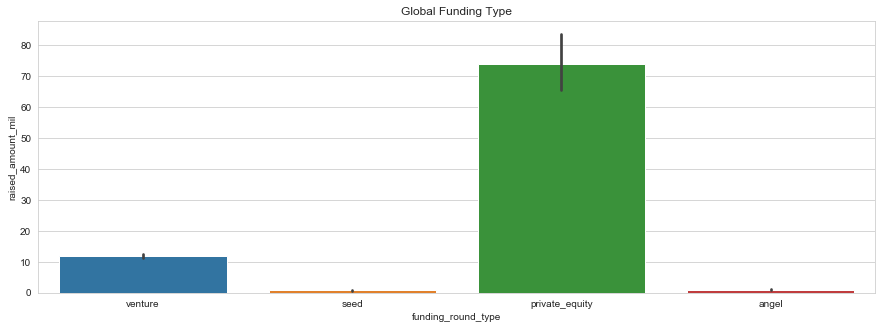

In [111]:
plt.figure(figsize=(15,5))
sns.barplot(x='funding_round_type',y='raised_amount_mil',data=master_frame2,estimator=np.mean)
plt.xlabel('funding_round_type')
plt.ylabel('raised_amount_mil')
plt.title('Global Funding Type')

plt.show()

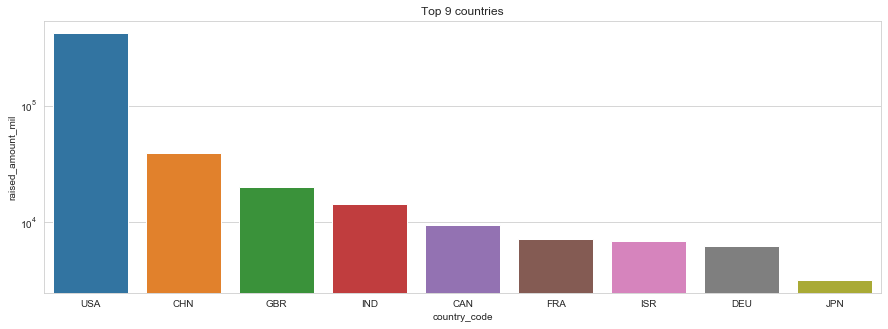

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x='country_code',y='raised_amount_mil',data=top9)
plt.yscale('log')
plt.xlabel('country_code')
plt.ylabel('raised_amount_mil')
plt.title('Top 9 countries')

plt.show()

### To plot a barchart showing number of investments in top3 sector in top 3 countries refer below:

In [89]:
F1 = pd.DataFrame(D1.groupby(D1.Main_sector).raised_amount_mil.sum().sort_values(ascending=False).head(3))

In [90]:
F2 = pd.DataFrame(D2.groupby(D2.Main_sector).raised_amount_mil.sum().sort_values(ascending=False).head(3))

In [91]:
F3 = pd.DataFrame(D3.groupby(D3.Main_sector).raised_amount_mil.sum().sort_values(ascending=False).head(3))

In [92]:
print(F1)
print(F2)
print(F3)

                                         raised_amount_mil
Main_sector                                               
Others                                          26356.0065
Social, Finance, Analytics, Advertising         23832.3769
Cleantech / Semiconductors                      21673.4317
                                         raised_amount_mil
Main_sector                                               
Others                                           1298.6245
Cleantech / Semiconductors                       1163.9904
Social, Finance, Analytics, Advertising          1089.4042
                                         raised_amount_mil
Main_sector                                               
Others                                           1013.4095
Social, Finance, Analytics, Advertising           550.5496
News, Search and Messaging                        433.8346


From the above observation we come to know that the values in Main sector is set as index so to convert it into column

In [93]:
### converting index values to column values.
F1.reset_index(inplace=True)
print(F1)
F2.reset_index(inplace=True)
print(F2)
F3.reset_index(inplace=True)
print(F3)

                               Main_sector  raised_amount_mil
0                                   Others         26356.0065
1  Social, Finance, Analytics, Advertising         23832.3769
2               Cleantech / Semiconductors         21673.4317
                               Main_sector  raised_amount_mil
0                                   Others          1298.6245
1               Cleantech / Semiconductors          1163.9904
2  Social, Finance, Analytics, Advertising          1089.4042
                               Main_sector  raised_amount_mil
0                                   Others          1013.4095
1  Social, Finance, Analytics, Advertising           550.5496
2               News, Search and Messaging           433.8346


In [94]:
#### Adding country_code column to the dataframes and setting their country_code accordingly
F1["country_code"]="USA"
F2["country_code"]="GBR"
F3["country_code"]="IND"

In [95]:
### Concatenating the 3 DataFrames
result= pd.concat([F1,F2,F3],sort=False)

In [96]:
result

,Main_sector,raised_amount_mil,country_code
0,Others,26356.0065,USA
1,"Social, Finance, Analytics, Advertising",23832.3769,USA
2,Cleantech / Semiconductors,21673.4317,USA
0,Others,1298.6245,GBR
1,Cleantech / Semiconductors,1163.9904,GBR
2,"Social, Finance, Analytics, Advertising",1089.4042,GBR
0,Others,1013.4095,IND
1,"Social, Finance, Analytics, Advertising",550.5496,IND
2,"News, Search and Messaging",433.8346,IND


In [ ]:
plt.figure(figsize=[20,8])
sns.barplot(x='country_code',y='raised_amount_mil',data=result,hue="Main_sector",estimator=sum)